In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
from matplotlib.pyplot import cm
import ef1 as ef
rrperiod=1
ir=ef.get_rr_returns(rrperiod)

rets=ef.get_returns()

n_points=500

ier=ef.RR_returns(ir[:])
cov=ir[:].cov()


df2=pd.DataFrame(data={
    "Returns":ier.values,
    "Volatility":ir[:].std().values},
    index= ier.index.values
)
summary=ef.summary_stats(ir[:],rets,0.06)

In [150]:
df1 = ef.efficient_frontier(ier,cov, show_cml=True,n_points=n_points,riskfree_rate=0.06, show_ew=True, show_gmv=True)

<AxesSubplot:title={'center':'Efficient Frontier Curve'}, xlabel='Volatility'>

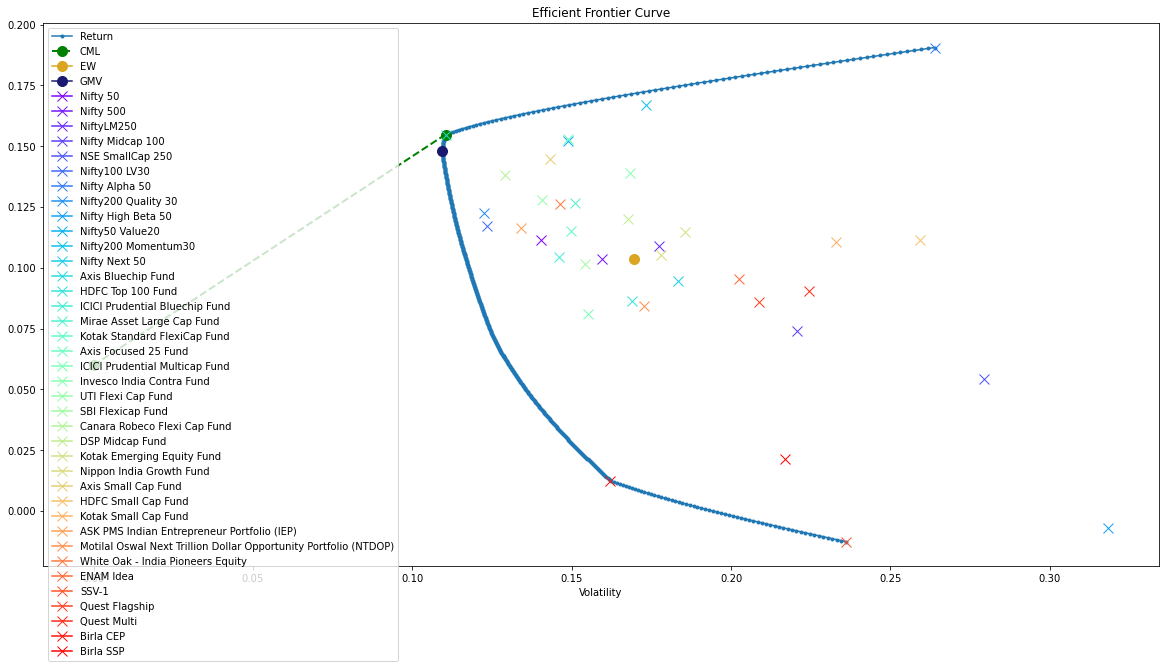

In [151]:
ef.plot_efficient_frontier(n_points,ier,cov,df2,style='.-', legend=True, show_cml=True, riskfree_rate=0.06, show_ew=True, show_gmv=True)

In [6]:
prof=pd.read_excel('Profile.xlsx',header=0,index_col=0)
prof=prof.astype(float)
Conservative=prof.iloc[0:1,:]
Moderate=prof.iloc[1:2,:]
Growth=prof.iloc[2:3,:]
Aggressive=prof.iloc[3:4,:]
Pure_Equity=prof.iloc[4:5,:]
Optimus_Mod=prof.iloc[5:6,:]
Optimus_Agg=prof.iloc[6:7,:]
Optimus_Mom=prof.iloc[7:8,:]
Optimus_3Managers=prof.iloc[8:9,:]
Optimus_3Managers_Mom=prof.iloc[9:10,:]
DPMS=prof.iloc[10:11,:]
DPMS2=prof.iloc[11:12,:]
DPMS3=prof.iloc[12:13,:]
Consv=pd.concat([ef.portfolio_rets(Conservative,ier.values),ef.portfolio_vols(Conservative,cov)],axis=1)
Mod=pd.concat([ef.portfolio_rets(Moderate,ier.values),ef.portfolio_vols(Moderate,cov)],axis=1)
Grow=pd.concat([ef.portfolio_rets(Growth,ier.values),ef.portfolio_vols(Growth,cov)],axis=1)
Agg=pd.concat([ef.portfolio_rets(Aggressive,ier.values),ef.portfolio_vols(Aggressive,cov)],axis=1)
PureEqui=pd.concat([ef.portfolio_rets(Pure_Equity,ier.values),ef.portfolio_vols(Pure_Equity,cov)],axis=1)
Optimus_Moderate=pd.concat([ef.portfolio_rets(Optimus_Mod,ier.values),ef.portfolio_vols(Optimus_Mod,cov)],axis=1)
Optimus_Aggressive=pd.concat([ef.portfolio_rets(Optimus_Agg,ier.values),ef.portfolio_vols(Optimus_Agg,cov)],axis=1)
Optimus_Momentum=pd.concat([ef.portfolio_rets(Optimus_Mom,ier.values),ef.portfolio_vols(Optimus_Mom,cov)],axis=1)
Optimus_3_Managers=pd.concat([ef.portfolio_rets(Optimus_3Managers,ier.values),ef.portfolio_vols(Optimus_3Managers,cov)],axis=1)
Optimus_3Managers_Momentum=pd.concat([ef.portfolio_rets(Optimus_3Managers_Mom,ier.values),ef.portfolio_vols(Optimus_3Managers_Mom,cov)],axis=1)
DPMs=pd.concat([ef.portfolio_rets(DPMS,ier.values),ef.portfolio_vols(DPMS,cov)],axis=1)
DPMs2=pd.concat([ef.portfolio_rets(DPMS2,ier.values),ef.portfolio_vols(DPMS2,cov)],axis=1)
DPMs3=pd.concat([ef.portfolio_rets(DPMS3,ier.values),ef.portfolio_vols(DPMS3,cov)],axis=1)
cf=pd.concat([Consv,Mod,Grow,Agg,PureEqui,Optimus_Moderate,Optimus_Aggressive,Optimus_Momentum,Optimus_3_Managers,Optimus_3Managers_Momentum,DPMs,DPMs2,DPMs3],axis=0)
cf.columns=["Return","Volatility"]

In [153]:
with pd.ExcelWriter('RR 1 Year.xlsx') as writer:
    summary.to_excel(writer, sheet_name='Summary')
    df1.to_excel(writer, sheet_name='Efficient Frontier')
    df2.to_excel(writer, sheet_name='Return Vol Data')
    cf.to_excel(writer, sheet_name='Profile Output')

In [7]:
with pd.ExcelWriter('Test.xlsx') as writer:
    cf.to_excel(writer, sheet_name='Summary')